<a href="https://colab.research.google.com/github/TiagoBem/PredictionModel/blob/main/AnaliseDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(29,)
UL_bitrate        0.936261
DL_bitrate_N-1    0.930767
DL_bitrate_N-2    0.879282
UL_bitrate_N-1    0.870646
DL_bitrate_N-3    0.845094
UL_bitrate_N-2    0.820907
DL_bitrate_N-4    0.820167
Name: DL_bitrate, dtype: float64
0.9362607710214264


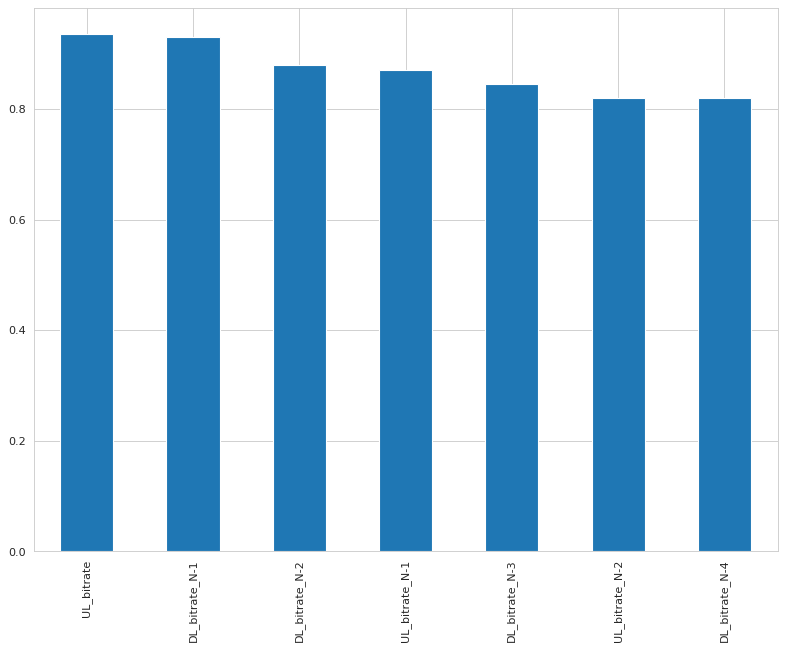

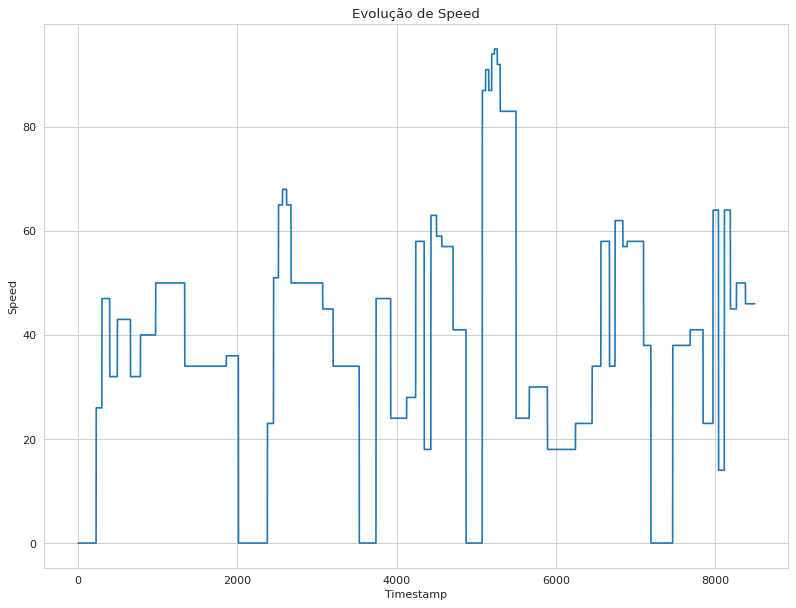

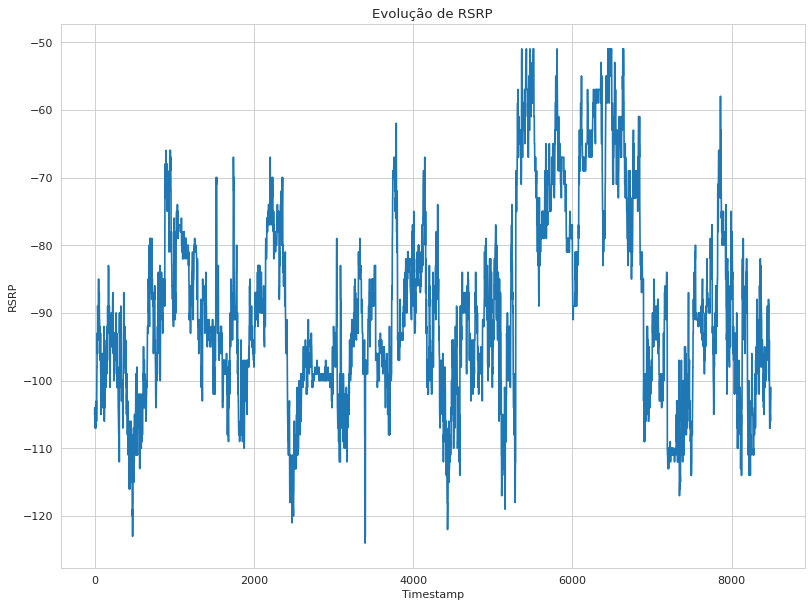

KeyboardInterrupt: ignored

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('BiggestSeq.csv')
dataset = dataset.dropna()
dataset = dataset.loc[:,~dataset.columns.str.match("Unnamed")]

# correlacoes

correlations = dataset.corr().loc['DL_bitrate'].transpose()
print(correlations.shape)
correlations.pop('DL_bitrate')
correlations = correlations[correlations > 0.8]
correlations = correlations.sort_values(ascending=False)
print(correlations)
print(max(correlations))

labels = correlations.index
x_pos = np.arange(len(labels))

plt.figure(figsize=(12,9), dpi=80)
#plt.bar(correlations,height=1)
correlations.plot(kind='bar')
plt.xticks(x_pos,labels)
plt.show()

# evolucao de cada feature
for i in range(3,7):
  column = dataset.columns[i]
  plt.figure(figsize=(12, 9), dpi=80)
  plt.plot(dataset[column])
  plt.title('Evolução de ' + str(column))
  plt.ylabel(column)
  plt.xlabel('Timestamp')
  plt.show()

plt.figure(figsize=(12, 9), dpi=80)
plt.plot(dataset['UL_bitrate'])
plt.title('Evolução de UL_bitrate')
plt.ylabel('UL_bitrate')
plt.xlabel('Timestamp')
plt.show()

print("Máxima diferença entre Timestamps: ", max(dataset['TimeDiff']))
print("Mínima diferença entre Timestamps: ", min(dataset['TimeDiff']))

# media de throughput
print("DL_bitrate maximo: ",max(dataset['DL_bitrate']))
print("DL_bitrate minimo: ",min(dataset['DL_bitrate']))
print("DL_bitrate médio: ",dataset['DL_bitrate'].mean())

# Variation Range
import statistics
print("Variance do dataset: ",statistics.variance(dataset['DL_bitrate']))

# standard deviation
print("Standard deviation do dataset: ",statistics.stdev(dataset['DL_bitrate']))

# CDF
plt.figure(figsize=(8, 6), dpi=80)
dataset['DL_bitrate'].hist(cumulative=True, density=1, histtype='step', bins=1000)
plt.legend('CDF')
plt.show()

# Normal distribution
import seaborn as sb

def normal_dist(x, mean, sd):
  return (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)

ND = normal_dist(dataset['DL_bitrate'],np.mean(dataset['DL_bitrate']),np.std(dataset['DL_bitrate']))
 
sb.set_style('whitegrid')
sb.lineplot(dataset['DL_bitrate'], ND , color = 'black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')
plt.show()

# timestamp com maior quebra de DL_bitrate
def biggest_drop():
  max = 0
  max_row = 0
  for row in dataset.index:
    aux = dataset['DL_bitrate_N-1'][row] - dataset['DL_bitrate'][row]
    if aux > max:
      max = aux
      max_row = row
  return max_row

drop = biggest_drop()
print("Maior quebra de DL_bitrate na linha " + str(drop) + ": " + str(dataset['DL_bitrate_N-1'][drop] - dataset['DL_bitrate'][drop]) + " DL_bitrate_N-1: " + str(dataset['DL_bitrate_N-1'][drop]) + "  DL_bitrate: " + str(dataset['DL_bitrate'][drop]))


# timestamp com maior subida de DL_bitrate
def biggest_raise():
  max = 0
  max_row = 0
  for row in dataset.index:
    aux = dataset['DL_bitrate'][row] - dataset['DL_bitrate_N-1'][row]
    if aux > max:
      max = aux
      max_row = row
  return max_row

increase = biggest_raise()
print("Maior subida de DL_bitrate na linha " + str(increase) + ": " + str(dataset['DL_bitrate'][increase] - dataset['DL_bitrate_N-1'][increase]) + " DL_bitrate_N-1: " + str(dataset['DL_bitrate_N-1'][increase]) + "  DL_bitrate: " + str(dataset['DL_bitrate'][increase]))